In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Manifold learning

In [2]:
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize = (4,1))
    fig.subplots_adjust(left = 0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # open the file and draw random spots from the file
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :,0].T #from (72,288,4) to (288,72)
    rng = np.random.RandomState(rseed)
    X=rng.rand(4*N, 2) # 4000*2
    i, j = (X*data.shape).astype(int).T #2*4000 and each row # also connect the random spots with the png
    mask = (data[i,j]<1) # 1. i,j are the index used for next step 
    # use mask to find the useful point from data. ? data[i,j]<1 for pixel of hello on the png
    X = X[mask] # only 1500+ left 
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])] # sort based on the first column and return the index
make_hello()

array([[0.08373647, 0.31577315],
       [0.08729359, 0.66378969],
       [0.08849421, 0.32361022],
       ...,
       [3.92447163, 0.64950893],
       [3.92503031, 0.3816165 ],
       [3.93760872, 0.52569018]])

## step by step for function make_hello

In [13]:
np.random.RandomState(42).rand(3,2)

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452]])

In [16]:
fig, ax = plt.subplots(figsize = (4,1))
fig.subplots_adjust(left = 0, right=1, bottom=0, top=1)
ax.axis('off')
ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
fig.savefig('hello.png')
plt.close(fig)
from matplotlib.image import imread
data = imread('hello.png')[::-1, :,0].T


In [20]:
imread('hello.png').shape

(72, 288, 4)

In [21]:
data.shape

(288, 72)

In [67]:
rng = np.random.RandomState(42)
X=rng.rand(4*1000, 2)
i, j = (X*data.shape).astype(int).T

In [68]:
(X*data.shape).shape

(4000, 2)

In [30]:
x=rng.rand(4*1, 2)
x

array([[0.69350984, 0.03971121],
       [0.83940804, 0.44817085],
       [0.63669291, 0.22123782],
       [0.67707371, 0.77224028]])

In [62]:
X*data.shape

array([[107.86755423,  68.45143006],
       [210.81425524,  43.10341086],
       [ 44.93336845,  11.23160546],
       ...,
       [ 33.63958303,  19.66749267],
       [ 60.3415366 ,  32.78366999],
       [261.63001379,   7.52258281]])

In [36]:
np.array([[1,1],[2,2]])*(288,72) #dot.

array([[288,  72],
       [576, 144]])

In [63]:
X
X.shape

(4000, 2)

In [40]:
print((X*data.shape).astype(int).T.shape)
print(i.shape)
print(j.shape)

(2, 4000)
(4000,)
(4000,)


In [42]:
i[0:10]

array([107, 210,  44,  16, 173,   5, 239,  52,  87, 124])

In [43]:
j[0:10]

array([68, 43, 11, 62, 50, 69, 15, 13, 37, 20])

In [58]:
mask = (data[i,j]<1)
mask.shape

(4000,)

In [69]:
X = X[mask]

In [70]:
X.shape

(1532, 2)

In [71]:
X[:, 0] *= (data.shape[0] / data.shape[1])


In [72]:
X[:, 0]

array([0.62407456, 0.23233445, 3.32977056, ..., 2.61910301, 1.09604712,
       3.63375019])

In [77]:
X = X[:1000]
X


array([[0.62407456, 0.15599452],
       [0.23233445, 0.86617615],
       [3.32977056, 0.21233911],
       ...,
       [2.49402124, 0.13128797],
       [1.23876684, 0.20179495],
       [0.73617909, 0.75645109]])

In [79]:
X = X[:1000]

In [80]:
X[np.argsort(X[:, 0])]

array([[0.08373647, 0.31577315],
       [0.08729359, 0.66378969],
       [0.08849421, 0.32361022],
       ...,
       [3.92447163, 0.64950893],
       [3.92503031, 0.3816165 ],
       [3.93760872, 0.52569018]])

## example 

(1000, 2)


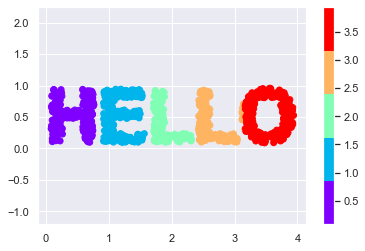

In [3]:
X = make_hello(1000)
print(X.shape)
colorize = dict(c=X[:,0], cmap = plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.colorbar()
plt.axis('equal');

# Multidimensional scaling (MDS) 

(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

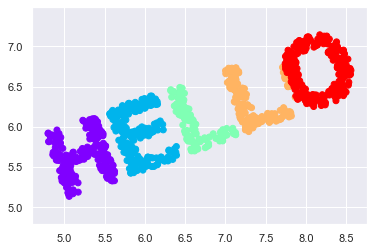

In [5]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

X2 = rotate(X, 20) + 5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

In [6]:
np.deg2rad(20)

0.3490658503988659

In [9]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

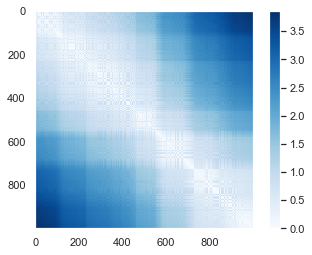

In [12]:
plt.imshow(D, zorder = 2, cmap ='Blues', interpolation='nearest')
plt.colorbar()

In [14]:
D2 = pairwise_distances(X2)
np.allclose(D,D2)

True

In [24]:
def random_projection(X, dimension = 3, rseed = 42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.rand(dimension, dimension)
    e,V = np.linalg.eigh(np.dot(C, C.T)) # np.dot is the matrix multiplication for 2-D array
    return np.dot(X, V[:X.shape[1]]) # V.shape 2*3 
X3 = random_projection(X, 3)
X3 # 1000 * 3 

array([[ 0.05485254, -0.2929917 , -0.13368448],
       [ 0.1733343 , -0.61019424, -0.21413812],
       [ 0.05446153, -0.30043569, -0.13902207],
       ...,
       [-2.34109804, -0.84396291, -3.10327665],
       [-2.43445776, -0.60000218, -3.04383096],
       [-2.39267116, -0.73203356, -3.08550875]])

In [20]:
rng = np.random.RandomState(42)
C = rng.rand(3, 3)
print(C)

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]]


In [21]:
e,V = np.linalg.eigh(np.dot(C, C.T))
print(e)
print(V)

[6.38200958e-04 3.23374315e-01 2.77798277e+00]
[[-0.65398973 -0.06431174 -0.75376484]
 [ 0.34713315 -0.91080089 -0.22347331]
 [ 0.67215773  0.40780602 -0.61797916]]


In [22]:
np.dot(C, C.T)

array([[1.57995312, 0.48673782, 1.28525324],
       [0.48673782, 0.40706809, 0.26368252],
       [1.28525324, 0.26368252, 1.11497408]])

In [23]:
V[:2]

array([[-0.65398973, -0.06431174, -0.75376484],
       [ 0.34713315, -0.91080089, -0.22347331]])

In [26]:
V[:2].shape

(2, 3)

In [25]:
X3.shape

(1000, 3)

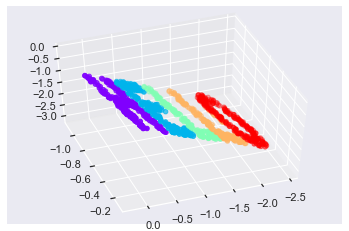

In [27]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2],
            **colorize)
ax.view_init(azim=70, elev=50)

(-1.0390064107727583,
 1.037713398996315,
 -2.064666005451131,
 2.1354582444849135)

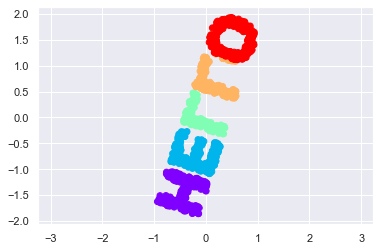

In [31]:
from sklearn.manifold import MDS
# precomputed dissimilarity to specify that we are passing a distance matrix:
model = MDS(n_components = 2, random_state = 1) 

out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

# This is essentially the goal of a manifold learning estimator: given high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data. In the case of MDS, the quantity preserved is the distance between every pair of points.

# Nonlinear embedding, where MDS fails

In [32]:
# make the s-curved 3-d data XS
def make_hello_s_curve(X):
    t = [(X[:,0]-2)*0.75*np.pi]
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t) * (np.cos(t)-1)
    return np.vstack((x,y,z)).T
XS = make_hello_s_curve(X)

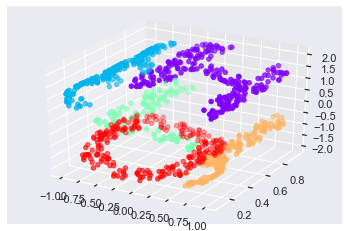

In [34]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter(XS[:,0], XS[:,1], XS[:,2],
          **colorize);

(-1.3904556323554311,
 1.2493637628504939,
 -2.385549418165914,
 2.1899859123555574)

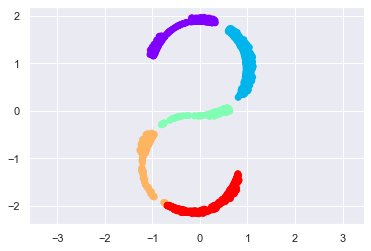

In [35]:
from sklearn.manifold import MDS
model = MDS(n_components = 2, random_state = 2)
outS = model.fit_transform(XS)
plt.scatter(outS[:,0], outS[:,1], **colorize)
plt.axis('equal')

# Nonlinear embedding: locally linear embedding

(-0.07049105379266134,
 0.061563841145897864,
 0.07326516932710135,
 -0.07622132675429892)

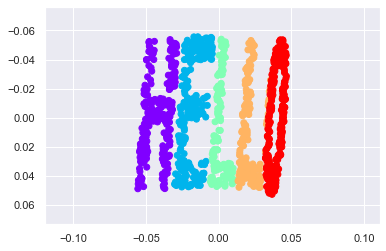

In [39]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors = 100, n_components = 2, method = 'modified',
                              eigen_solver = 'dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
plt.scatter(out[:,0],out[:,1], **colorize)
plt.ylim(0.15, -0.15) # ax.set_ylim(0.15, -0.15)
plt.axis('equal') # ax.axis('equal')

# Isomap on faces

In [40]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 30)
faces.data.shape


(2370, 2914)

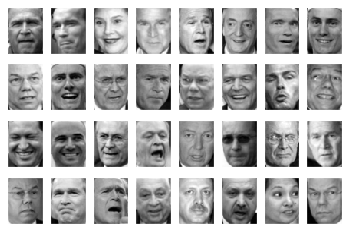

In [46]:
fig, axes = plt.subplots(4, 8, subplot_kw = dict(xticks = [], yticks = []))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap = 'gist_gray')

Text(0, 0.5, 'cumulative explained variance')

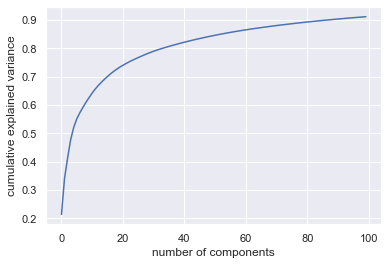

In [47]:
from sklearn.decomposition import PCA
model = PCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [82]:
from sklearn.manifold import Isomap
model = Isomap(n_components = 2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [57]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gist_gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]]) # add more points into shown_image 
            # to make sure new images are not close to the existing ones
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [83]:
min_dist_2 = (0.05 * max(proj.max(0) - proj.min(0))) ** 2
min_dist_2

559520.6739555236

In [84]:
2*proj.max(0)

array([16555.5608552 , 13521.58959891])

In [85]:
np.array([2 * proj.max(0)])

array([[16555.5608552 , 13521.58959891]])

In [87]:
shown_images = np.array([2 * proj.max(0)])
print(shown_images)
shown_images = np.vstack([shown_images, proj[1]])
print(shown_images)

[[16555.5608552  13521.58959891]]
[[16555.5608552  13521.58959891]
 [ 1987.86533829  -310.79689456]]


In [91]:
np.sum((proj[2] - shown_images) ** 2, 1)
type(np.sum((proj[2] - shown_images) ** 2, 1))

numpy.ndarray

In [80]:
shown_images

array([[17195.01004927, 16773.04165804]])

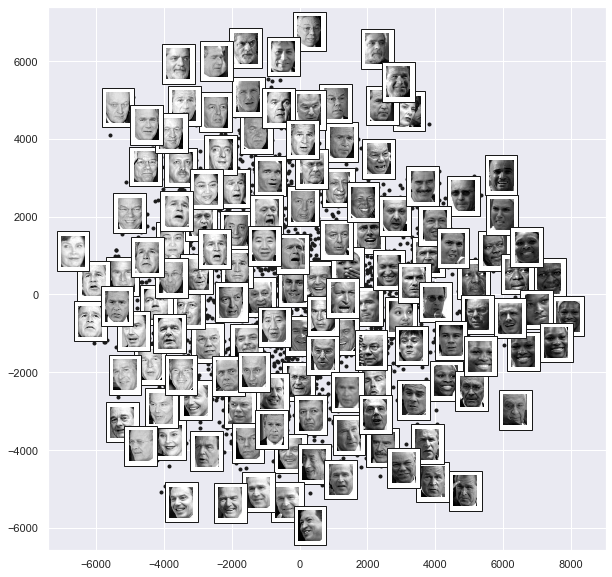

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

#  Visualizing structure in digits

In [61]:
from sklearn.datasets import fetch_openml
mist = fetch_openml("mnist_784")
mist.data.shape

(70000, 784)

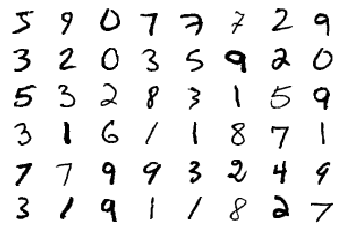

In [63]:
fig, axes = plt.subplots(6,8, subplot_kw = dict(xticks = [], yticks = []))

for i, ax in enumerate(axes.flat):
    ax.imshow(mist.data[1250*i].reshape(28,28), cmap = 'gist_gray_r')

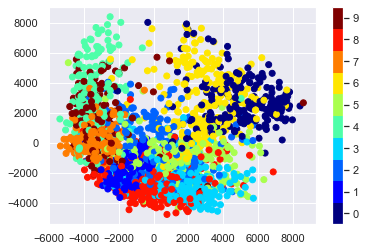

In [68]:
data = mist.data[::30]
target = mist.target[::30]
model = Isomap(n_components = 2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target.astype(int), cmap=plt.cm.get_cmap('jet', 10)) # need to change target to int
plt.colorbar(ticks = range(10))
plt.clim(-0.5,9.5)

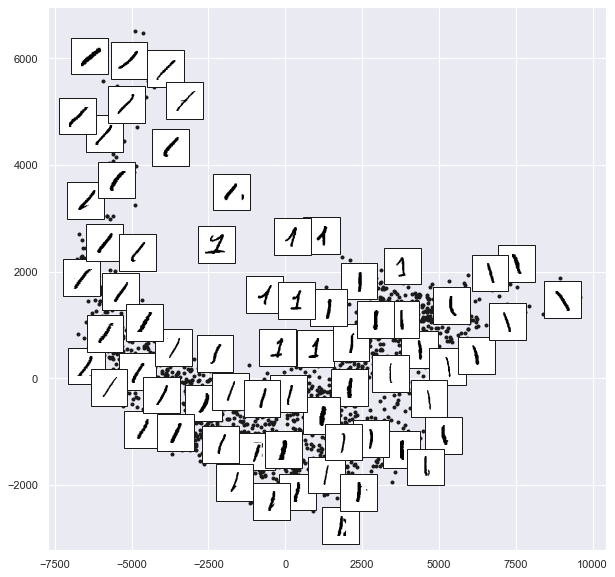

In [75]:
from sklearn.manifold import Isomap

# Choose 1/4 of the "1" digits to project
data = mist.data[mist.target == '1'][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gist_gray_r')

In [74]:
data.shape

(0, 784)

In [73]:
data.reshape((-1, 28, 28)).shape


(0, 28, 28)